In [4]:
import random_resources
from matplotlib import pyplot as plt
import numpy as np
import time 


In [6]:
def naive_search_position_with_bounds(t, e, start, end) -> tuple:
    comps = 0 
    for i in range(start, end):
        comps += 1
        if t[i] == e: return i, comps  # position found!
    return None, comps  # for all i, no position found!
def naive_search_position(t, e):
    return naive_search_position_with_bounds(t, e, 0, len(t))



# returns None if the element is not inside the array
# else returns one of its position
def dichotomic_search_position_with_bounds(t, x, begin, end):
    if end - begin == 1:  # base case
        if x == t[begin]:
            return begin
        return None
    # general case
    middle = (begin + end) // 2
    if x == t[middle]:  # exact position found!
        return middle
    if x < t[middle]:  # on the left...
        return dichotomic_search_position_with_bounds(t, x, begin, middle)
    return dichotomic_search_position_with_bounds(t, x, middle, end)
def dichotomic_search_position(a, e):
    return dichotomic_search_position_with_bounds(a, e, 0, len(a))



# def search_minimum_position_with_bounds(a, start, end):
#     comps = 0
#     swaps = 0
#     min_pos = start
#     for i in range(start + 1, end):
#         comps += 1
#         if a[i] < a[min_pos]:
#             min_pos = i
#     return min_pos, comps, swaps
# def search_minimum_position(a):
#     return search_minimum_position_with_bounds(a, 0, len(a))



# # find the position of an element in a sorted array
# # returned position is the one the element
# # could be inserted at
# def dicho_find_pos(t, e, begin, end, comps = 0):
#     if end-begin == 0: return begin, 0, 0
#     if end-begin == 1:
#         if t[begin] == e:
#             return begin, 1, 0
#         if t[begin] < e:
#             return end, 2, 0
#         return begin, 2, 0
    
#     mid = (begin+end)//2
#     if t[mid] > e:
#         p, c, m = dicho_find_pos(t, e, begin, mid)
#         return p, c+1, 0
#     else:
#         p, c, m = dicho_find_pos(t, e, mid, end)
#         return p, c+1, 0
    

def recursive_dichotomic_with_comps(arr, key, begin, end, comps=0):
    if begin >= end: # base 
        return None, comps 
    mid = (begin + end) // 2
    comps += 1
    if arr[mid] == key: return mid, comps
    elif arr[mid] > key: return recursive_dichotomic_with_comps(arr, key, begin, mid, comps)
    else: return recursive_dichotomic_with_comps(arr, key, mid + 1, end, comps)

def recursive_dichotomic(arr, key):
    return recursive_dichotomic_with_comps(arr, key, 0, len(arr))



# Iterative Dichotomic search
def iterative_dichotomic(arr, key):
    begin, end = 0, len(arr)
    # comps = 0
    while begin < end:
        mid = (begin + end)//2
        # comps += 1
        if arr[mid] == key: return mid 
        elif arr[mid]  > key: end = mid 
        else: begin = mid + 1
    return None # key wasn't found.


def iterative_dichotomic_with_comps(arr, key):
    begin, end = 0, len(arr)
    comps = 0
    while begin < end:
        mid = (begin + end)//2
        comps += 1
        if arr[mid] == key: return mid, comps 
        elif arr[mid]  > key: end = mid 
        else: begin = mid + 1
    return None, comps # key wasn't found.


def test_search_consistency(N: int, step_size=10):
    """
    Test if all three searching algorithms have consistent values over N sorted arrays.
    For each A_k, test consistency for all integer values in [A_k[0], A_k[-1] + 1]
    """
    # Initialize variables to collect comparison counts 
    naïve_comps = []
    dicho_comps_it = []
    dicho_comps_rec = []
    
    for size in range(1, N+1, step_size):
        # Generate sorted array of size values `size`
        # array = list(range(1,size+1)) 
        array = random_resources.sorted_random_list(size)
        test_values = list(range(array[0]-1, array[-1]+5))
        # Define test range for each array 
        
        
        print(f"Searching in array of size = {size}...")
        
        for value in test_values:
            # Naïve search
            _, comps_naïve = naive_search_position(array, value)
            
            # Recursive Dichotomic search 
            _, comps_dicho_rec = recursive_dichotomic(array, value)

            # Iterative Dichotomic search
            _, comps_dicho_it = iterative_dichotomic_with_comps(array, value)

            # Collecting number of comparisons for each algorithm.
            naïve_comps.append(comps_naïve)
            dicho_comps_rec.append(comps_dicho_rec)
            dicho_comps_it.append(comps_dicho_it)
            
            # Check for consistency: Positions should match if element is found
            naive_result, _ = naive_search_position(array, value)
            dicho_result = dichotomic_search_position(array, value)
            
            if naive_result != dicho_result:
                print(f"Concistency Error for value {value} in array {array}")
                print(f"Naïve result: {naive_result}")
                print(f"Dicho result: {dicho_result}")
                # return naïve_comps, dicho_comps_rec, dicho_comps_it, False 
                return [], [], []
    
        
    return naïve_comps, dicho_comps_rec, dicho_comps_it


def get_mean_comps(size:int, Number_exp: int, step_size = 1):
    mean_naive_comps = []
    mean_dicho_rec = []
    mean_dicho_it = []
    Sizes = []
    sum_naive, sum_dicho_rec, sum_dicho_it = 0,0,0
    
    for i in range(1, size+step_size, step_size):
        Sizes.append(i)
        print(f"Running all 3 algorithms on an array of size {i} for {Number_exp} times.")
        
        array = random_resources.sorted_random_list(i)
        test_values = list(range(array[0]-1, array[-1]+5))
        
        for _ in range(Number_exp):
             # Generate sorted array of size values `size`
            # Define test range for each array 
            for value in test_values:
                _, comps_naïve = naive_search_position(array, value)
                _, comps_dicho_rec = recursive_dichotomic(array, value)
                _, comps_dicho_it = iterative_dichotomic_with_comps(array, value)

                sum_naive += comps_naïve
                sum_dicho_rec += comps_dicho_rec
                sum_dicho_it += comps_dicho_it 
                
                # Check for consistency: Positions should match if element is found
                naive_result, _ = naive_search_position(array, value)
                dicho_result = dichotomic_search_position(array, value)
                
                if naive_result != dicho_result:
                   print(f"Concistency Error for value {value} in array {array}")
                   # return naïve_comps, dicho_comps_rec, dicho_comps_it, False 
                   return [], [], []
               
        mean_naive_comps.append(sum_naive/Number_exp)
        mean_dicho_rec.append(sum_dicho_rec/Number_exp)
        mean_dicho_it.append(sum_dicho_it/Number_exp)
    return Sizes, mean_naive_comps, mean_dicho_rec, mean_dicho_it 
            

    
def plot_comparisons(N, Sizes, mean_naive_comps, mean_dicho_comps, mean_dicho_it):
    """
    Plot the mean number of comparisons for each search algorithm and compare with reference functions.
    """
    
    
    # sizes = np.arange(1, N + 1)
    # mean_naive_comps = [np.mean(naive_comps[i * (N + 2):(i + 1) * (N + 2)]) for i in range(N)]
    # mean_dicho_comps = [np.mean(dicho_comps[i * (N + 2):(i + 1) * (N + 2)]) for i in range(N)]
    # mean_min_pos_comps = [np.mean(min_pos_comps[i * (N + 2):(i + 1) * (N + 2)]) for i in range(N)]

    plt.figure(figsize=(15, 8))

    # Plotting search comparison data
    plt.plot(Sizes, mean_naive_comps, label='Naive Search', marker='o', linewidth = 0.8, linestyle='--')
    plt.plot(Sizes, mean_dicho_comps, label='Dichotomic Search', marker='s',linewidth= 0.5,linestyle='--')
    plt.plot(Sizes, mean_dicho_it, label='Min Pos Search', marker='^', linewidth=0.7, linestyle='--')

    # Plotting reference functions
    plt.plot(Sizes, Sizes, label='f(x) = x', color='orange')
    plt.plot(Sizes, np.log2(Sizes), label='g(x) = log2(x)', color='red')

    plt.xlabel('Array Size')
    plt.ylabel('Mean Comparisons')
    plt.title('Mean Comparisons of Search Algorithms')
    plt.legend(["Naïve Linear Search", "Dichotomic Recursive", "Dichotomic Iterative", "n", "n^2"])
    plt.grid(True)
    plt.show()


def test_search_ok(searching_algo, array: list[int]) -> list:
    test_values = list(range(array[0]-1, array[-1]+5))
    for value in test_values:
        naive_result, _ = searching_algo(array, value)
        # dicho_result = dichotomic_search_position(array, value)
        pos_element = safe_index(array, value)
        if pos_element != naive_result:
            print(f"Failed at value: {value} in array {array}") 
            return False
    return True 


def test_search_consistency(searching_algo, name):
    final_answer = True 
    for i in range(1, 501):
        print(f"Testing {name} on size: {i}")
        array = random_resources.sorted_random_list(i)
        final_answer = final_answer and test_search_ok(searching_algo, array)
        if not final_answer:
            print(f"Uh oh... problem with {name}")
            exit()
    print(final_answer)


def safe_index(arr, key):
    try:
        return arr.index(key)
    except ValueError:
        return None 


def experience(searching_algo, size, exp):
    sum_c = 0
    exec_time = 0
    x = 0
    for _ in range(0, exp):
        array = random_resources.sorted_random_list(size)
        start_timestamp = int(time.time() * 1000)
        
        _, comps = searching_algo(array, array[size-1])
        # print(searching_algo(array, array[size-1]))
        # input()
        end_timestamp = int(time.time() * 1000)
        elapsed_time = end_timestamp - start_timestamp
        
        sum_c += comps 
        exec_time += elapsed_time
        
    return sum_c / exp, exec_time/exp * 1000
        

def test(searching_algo, name, max_length, step, exp):
    print(f"Collecting searching times for {name}")
    Sizes = []
    Comps = []
    Times_millisec = []
    
    for size in range(1, max_length, step):
        mean_comps, mean_time = experience(searching_algo, size, exp)

        # Adding collected data ...
        Sizes.append(size)
        Comps.append(mean_comps)
        Times_millisec.append(mean_time)
        
    return Sizes, Comps, Times_millisec  

In [7]:
print(f"-----------------------------------------------------------------")
N = 3000
exp = 10
step = 1

# Testing all searching algorithms.
# test_search_consistency(naive_search_position, "Naïve Search")
# test_search_consistency(recursive_dichotomic, "Dichotomic (Recursive)")
# test_search_consistency(iterative_dichotomic_with_comps, "Dichotomic (Iterative)")


# In this case, all algorithms have been verified to be correct and consistent. 
Algorithms = {
    "Naïve Search": naive_search_position,
    "Dichotomic (Recursive)": recursive_dichotomic,
    "Dichotomic (Iterative)": iterative_dichotomic
}

na_s, na_co, na_t = test(naive_search_position, "Naïve Search", N, step, exp)
dr_s, dr_co, dr_t = test(recursive_dichotomic, "Dichotomic (Recursive)", N, step, exp)
di_s, di_co, di_t = test(iterative_dichotomic_with_comps, "Dichotomic (Iterative)", N, step, exp)

-----------------------------------------------------------------


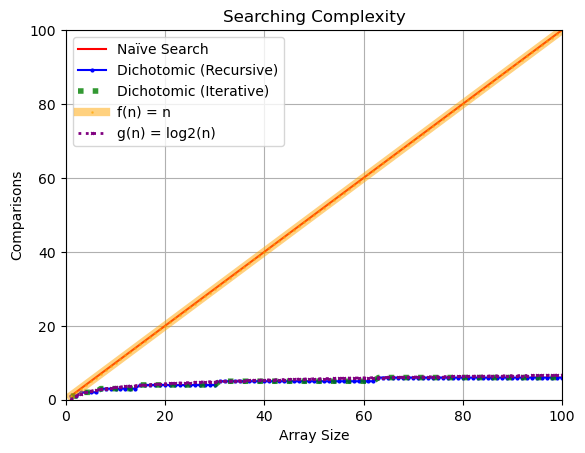

In [4]:
plt.title("Searching Complexity")
# Plotting comparisons data
plt.plot(na_s, na_co, color="r", label="Naïve Search", linestyle='-', linewidth=1.5, markersize=1, alpha=1)
plt.plot(dr_s, dr_co, color="b", label="Dichotomic (Recursive)", marker='o', linewidth=1.5, markersize=2)
plt.plot(di_s, di_co, color="g", label="Dichotomic (Iterative)", linestyle=":", linewidth=4, markersize=6, alpha=0.8)



lin = [n for n in na_s]
log2 = [np.log2(n) for n in dr_s]
# Plotting reference functions on the comparisons subplot
plt.plot(na_s, lin, label='f(n) = n', color='orange', linewidth=6, linestyle='-', marker='o', markersize=1, alpha=0.5)
plt.plot(dr_s, log2, label='g(n) = log2(n)', linewidth=2, color='purple', linestyle=':', marker='x', markersize=2, alpha=1)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(loc='upper left', fontsize=10)
plt.xlabel("Array Size")
plt.ylabel("Comparisons")
plt.grid(True);

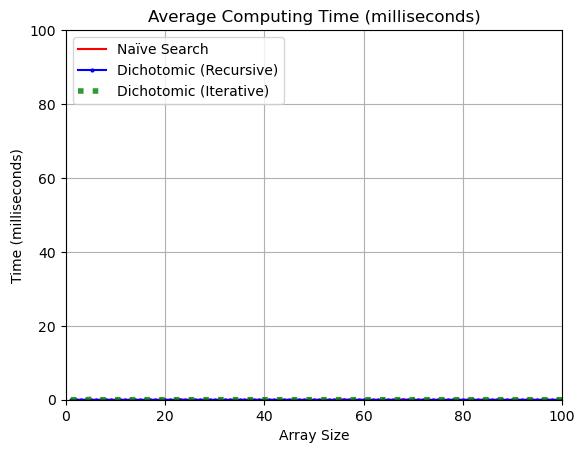

In [12]:
plt.title("Average Computing Time (milliseconds)")
# Plotting comparisons data
plt.plot(na_s, na_t, color="r", label="Naïve Search", linestyle='-', linewidth=1.5, markersize=1, alpha=1)
plt.plot(dr_s, dr_t, color="b", label="Dichotomic (Recursive)", marker='o', linewidth=1.5, markersize=2)
plt.plot(di_s, di_t, color="g", label="Dichotomic (Iterative)", linestyle=":", linewidth=4, markersize=6, alpha=0.8)



# lin = [n for n in na_s]
# log2 = [np.log2(n) for n in dr_s]
# # Plotting reference functions on the comparisons subplot
# plt.plot(na_s, lin, label='f(n) = n', color='orange', linewidth=6, linestyle='-', marker='o', markersize=1, alpha=0.5)
# plt.plot(dr_s, log2, label='g(n) = log2(n)', linewidth=2, color='purple', linestyle=':', marker='x', markersize=2, alpha=1)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(loc='upper left', fontsize=10)
plt.xlabel("Array Size")
plt.ylabel("Time (milliseconds)")
plt.grid(True);

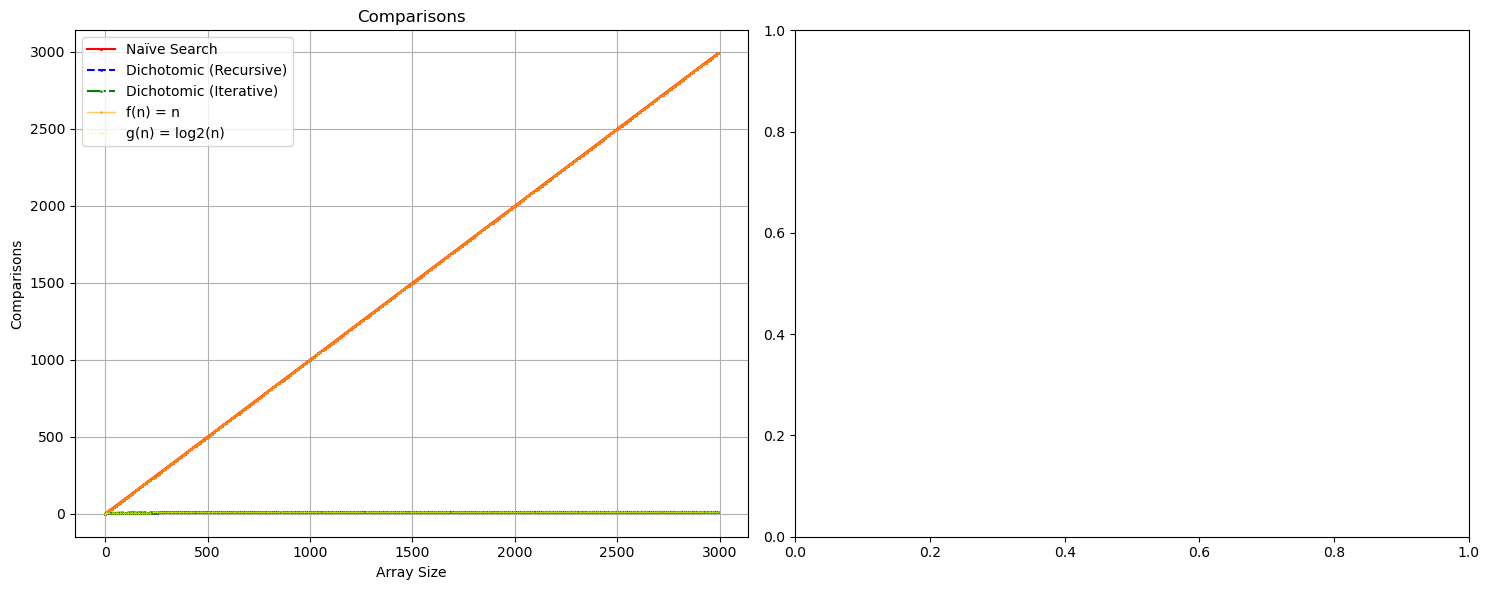

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Increase figure size for clarity

# Setting titles for subplots
ax1.set_title("Comparisons")
# ax2.set_title("Time")

# Plotting comparisons data
ax1.plot(na_s, na_co, color="r", label="Naïve Search", marker='s', linestyle='-', linewidth=1.5, markersize=1)
ax1.plot(dr_s, dr_co, color="b", label="Dichotomic (Recursive)", marker='o', linestyle='--', linewidth=1.5, markersize=1)
ax1.plot(di_s, di_co, color="g", label="Dichotomic (Iterative)", marker='^', linestyle='-.', linewidth=1.5, markersize=1)




lin = [n for n in na_s]
log2 = [np.log2(n) for n in dr_s]
# Plotting reference functions on the comparisons subplot
ax1.plot(na_s, lin, label='f(n) = n', color='orange', linewidth=1, linestyle='-', marker='D', markersize=1, alpha=0.6)
ax1.plot(dr_s, log2, label='g(n) = log2(n)', linewidth=1, color='yellow', linestyle=':', marker='x', markersize=1, alpha=0.6)

# Setting x and y limits for better visibility on comparisons
# ax1.set_xlim(0, N)
# ax1.set_ylim(0, max(na_co) * 1.2)  # Adjust the y-limit based on max comparisons

# Adding legend for comparisons subplot
ax1.legend(loc='upper left', fontsize=10)
ax1.set_xlabel("Array Size")
ax1.set_ylabel("Comparisons")
ax1.grid(True)



# # Plotting time data
# ax2.plot(na_s, na_t, color="r", label="Naïve Search", marker='o', linestyle='-', linewidth=1.5, markersize=1)
# ax2.plot(dr_s, dr_t, color="b", label="Dichotomic (Recursive)", marker='o', linestyle='--', linewidth=1.5, markersize=1)  # Assuming dr_co holds the times for Recursive
# ax2.plot(di_s, di_t, color="g", label="Dichotomic (Iterative)", marker='o', linestyle='-.', linewidth=1.5, markersize=1)

# # Setting x and y limits for better visibility on time
# # ax2.set_xlim(0, N)
# # ax2.set_ylim(0, max(na_t) * 1.2)  # Adjust the y-limit based on max time

# # Adding legend for time subplot
# ax2.legend(loc='upper left', fontsize=10)
# ax2.set_xlabel("Array Size")
# ax2.set_ylabel("Execution Time (ms)")
# ax2.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()